Даны две выборки, обучающая и тестовая: 

http://work.caltech.edu/data/in.dta 

http://work.caltech.edu/data/out.dta


Применить нелинейную трансформацию:

$$\phi(x1, x2) = (1, x1, x2, x1^2, x2^2, x1x2, |x1+x2|, |x1-x2|)$$

In [364]:
# обычные импорты
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np

In [365]:
# отключим надоедливые оповещения
import warnings
warnings.filterwarnings("ignore")

In [366]:
# прочитаем данные
data_in = pd.read_csv(r"in.dta.txt", encoding='cp1251', 
                      sep =';', delimiter='  ', header=None, 
                      names=['x1', 'x2', 'y'], dtype=None, na_values=None)
data_out = pd.read_csv(r"out.dta.txt", encoding='cp1251', 
                       sep =';', delimiter='  ', header=None, 
                       names=['x1', 'x2', 'y'])

In [367]:
data_in.head()

,x1,x2,y
0,-0.779470,0.838221,1.0
1,0.155635,0.895377,1.0
2,-0.059908,-0.717780,1.0
3,0.207596,0.758933,1.0
4,-0.195983,-0.375487,-1.0


In [368]:
data_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
x1    35 non-null float64
x2    35 non-null float64
y     35 non-null float64
dtypes: float64(3)
memory usage: 920.0 bytes


In [369]:
data_in.shape

(35, 3)

In [370]:
# заменим значения y= -1 на 0
data_in['y'][data_in['y']==-1.0] = data_in['y'][data_in['y']==-1.0].replace(-1.0, 0.00)

In [371]:
data_out.head()

,x1,x2,y
0,-0.106006,-0.081467,-1.0
1,0.177930,-0.345951,-1.0
2,0.102162,0.718258,1.0
3,0.694078,0.623397,-1.0
4,0.023541,0.727432,1.0


In [372]:
data_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
x1    250 non-null float64
x2    250 non-null float64
y     250 non-null float64
dtypes: float64(3)
memory usage: 5.9 KB


In [373]:
data_out.shape

(250, 3)

In [374]:
data_out['y'][data_out['y']==-1.0] = data_out['y'][data_out['y']==-1.0].replace(-1.0, 0.00)

In [375]:
def transformation(ser_1, ser_2):
    """функция принимает на вход объект pd.Series
    и возвращает список с массивами"""
    ser_1 = list(ser_1)
    ser_2 = list(ser_2)
    transformed_list = []
    for i,j in zip(ser_1, ser_2):
        transformed_var = [1, i, j, i**2, j**2, 
                     i*j, abs(i+j), abs(i-j)]
        transformed_list.append(transformed_var)
        
    return transformed_list

In [376]:
data_in['transformed'] = transformation(data_in['x1'], data_in['x2'])
data_in.head()

,x1,x2,y,transformed
0,-0.779470,0.838221,1.0,"[1, -0.77947021, 0.83822138, 0.607573808277444..."
1,0.155635,0.895377,1.0,"[1, 0.15563491, 0.89537743, 0.0242222252107080..."
2,-0.059908,-0.717780,1.0,"[1, -0.059907703, -0.71777995, 0.0035889328787..."
3,0.207596,0.758933,1.0,"[1, 0.20759636, 0.75893338, 0.0430962486852496..."
4,-0.195983,-0.375487,0.0,"[1, -0.19598312, -0.37548716, 0.03840938332493..."


In [377]:
data_out['transformed'] = transformation(data_out['x1'], data_out['x2'])
data_out.head()

,x1,x2,y,transformed
0,-0.106006,-0.081467,0.0,"[1, -0.10600562, -0.08146703400000001, 0.01123..."
1,0.177930,-0.345951,0.0,"[1, 0.17792951, -0.34595141, 0.031658910528840..."
2,0.102162,0.718258,1.0,"[1, 0.10216153, 0.71825825, 0.0104369782119409..."
3,0.694078,0.623397,0.0,"[1, 0.69407831, 0.62339743, 0.4817447004124560..."
4,0.023541,0.727432,1.0,"[1, 0.023541068, 0.72743221, 0.000554181882580..."


1. Применить линейную регрессию (можно пользоваться любыми библиотеками). Каковы значения ошибки классификации E_in и E_out? Ошибку классификации считать как долю неправильно классифицированных точек. 

In [378]:
# импортируем PCA и линейную регрессию
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [379]:
# разделим тренировочные данные на фичи и целевую переменную
X_train = data_in[['x1', 'x2']]
y_train = data_in['y']

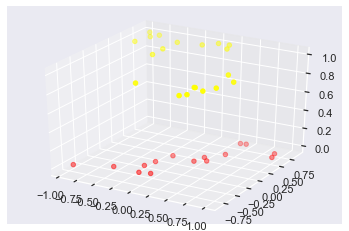

In [380]:
# взглянем на данные
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data_in['x1'], data_in['x2'], data_in['y'], c=data_in['y'], cmap='autumn');

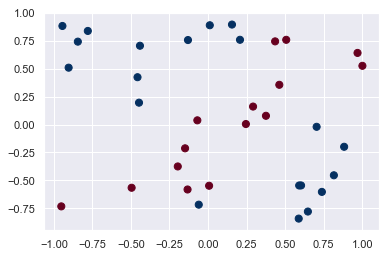

In [381]:
plt.scatter(data_in['x1'], data_in['x2'], c=data_in['y'], s=50, cmap='RdBu');

In [382]:
# фитим модель
model = LinearRegression(fit_intercept=True) # fit_intercept - центрировать данные (да/нет)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [383]:
# разделим тестовые данные на фичи и целевую переменную
X_test = data_out[['x1', 'x2']]
y_test = data_out['y']

In [384]:
# делаем предсказание
y_pred = model.predict(X_test)

In [385]:
# смотрим на полученные ответы
y_pred

array([0.57093437, 0.53344915, 0.61777413, 0.57377505, 0.623362  ,
       0.52796232, 0.62236887, 0.62155188, 0.66390336, 0.55232583,
       0.59178325, 0.57205238, 0.67720332, 0.58634177, 0.50040735,
       0.65693619, 0.61731429, 0.56433681, 0.55530235, 0.56253727,
       0.63293273, 0.66809376, 0.57453685, 0.45501826, 0.48783615,
       0.67453099, 0.57070038, 0.50953882, 0.45355378, 0.67514315,
       0.598561  , 0.60825656, 0.5845698 , 0.56824979, 0.63731399,
       0.59272331, 0.66188877, 0.47666751, 0.59856622, 0.61647566,
       0.53954696, 0.63615062, 0.55780151, 0.55977815, 0.54252095,
       0.60551661, 0.67393937, 0.59008823, 0.66408642, 0.661431  ,
       0.63376194, 0.65595635, 0.54918065, 0.48432671, 0.55989641,
       0.64218293, 0.58340688, 0.50757948, 0.56946796, 0.5358501 ,
       0.51762187, 0.56701762, 0.54918531, 0.56947328, 0.58768234,
       0.54722327, 0.57954688, 0.55299388, 0.61122184, 0.50739411,
       0.66740193, 0.54977572, 0.68796146, 0.54275195, 0.52298

In [386]:
# для бинарной классификации линейная регрессия годится не очень
# преобразуем данные в единицы и нули простым округлением
y_pred = np.round(y_pred)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0.

In [387]:
from sklearn.metrics import accuracy_score
print("Ошибка классификации Eout: {}".format(accuracy_score(y_test, y_pred)))
print("Ошибка классификации Ein: {}".format(accuracy_score(y_train, np.round(model.predict(X_train)))))



Ошибка классификации Eout: 0.412
Ошибка классификации Ein: 0.4


In [388]:
# подбрасывание монетки даст более точные результаты, чем эта модель 

2. Добавить к уравнению квадратичной ошибки регрессии регуляризатор 

$$P =\lambda/N \sum_{n=1}^{N=7} \ |\theta_n| $$

Каковы значения ошибки классификации Ein и Eout в этом случае?

In [389]:
# регуляризатор, использующий сумму модулей коэффициентов - это L1 (Lasso) 
from sklearn.linear_model import Lasso
N=7
model = Lasso(alpha=0.1/N) # установим альфа

In [390]:
model.fit(X_train, y_train)

Lasso(alpha=0.014285714285714287, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [391]:
y_pred = np.round(model.predict(X_test))

In [397]:
print("Ошибка классификации Eout: {}".format(accuracy_score(y_test, y_pred)))
print("Ошибка классификации Ein: {}".format(accuracy_score(y_train, np.round(model.predict(X_train)))))

Ошибка классификации Eout: 0.528
Ошибка классификации Ein: 0.5714285714285714


##### Вопросы по лекции

Хотелось бы понимать слайд ниже лучше:

1. Что из себя представляет матрица X ?
2. var(X) - это матрица коэффициентов ковариации? Ковариации чего с чем? Векторов X1,X2,...,Xp  друг с другом?
3. Собственных значений такой матрицы может быть больше или равно p ?
4. Что такое var(Yi) ? Почему оно равно лямбда итое?
5. Из лекции не удалось сформировать целостное понимание метода PCA. Есть ли какой-то хороший источник, где можно прочитать объяснение?
Спасибо


<img src="Screenshot_14.jpg" width="500">